In [8]:
import pandas as pd

# Load the data from the first CSV file
df1 = pd.read_csv(r"C:\Users\HP\Desktop\Dataset\Left&Right\sub1_run3_3.csv")

# Load the data from the second CSV file
df2 = pd.read_csv(r"C:\Users\HP\Desktop\Dataset\Left&Right\Sub1_run3_events.csv")

# Initialize a new column in the first DataFrame to store the updated target
df1['Updated_Target'] = df1["Target"]

# Loop through the events in the second DataFrame
for i in range(len(df2) - 1):
    onset_start = df2.loc[i, 'ONSET']
    onset_end = df2.loc[i + 1, 'ONSET']
    target = df2.loc[i, 'TARGET']

    # Find the rows within the specified time range
    mask = (df1['Time'] >= onset_start) & (df1['Time'] < onset_end)

    # Update the 'Updated_Target' column for the selected rows
    df1.loc[mask, 'Updated_Target'] = target

# Save the updated DataFrame to a new CSV file
df1.to_csv('sub1_run3_updated.csv', index=False)


C:\Users\HP\AppData\Local\Temp\ipykernel_23412\4060029872.py:4: DtypeWarning: Columns (65) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv(r"C:\Users\HP\Desktop\Dataset\Left&Right\sub1_run3_3.csv")


In [14]:
import pandas as pd

# Read the first CSV file
data = pd.read_csv(r"C:\Users\HP\Desktop\Dataset\Extrsa\sub1_run4_1.csv")

# Read the second CSV file
events = pd.read_csv(r"C:\Users\HP\Desktop\Dataset\Left&Right\Sub1_run3_events.csv")

# Initialize the 'Target' column with default values
data['Target'] = 'UNKNOWN'

# Loop through each event in the second CSV file
for i in range(len(events) - 1):
    current_onset = events.loc[i, 'ONSET']
    next_onset = events.loc[i + 1, 'ONSET']
    event_target = events.loc[i, 'TARGET']
    
    # Set the 'Target' column for rows within the onset time range
    data.loc[(data['Time'] >= current_onset) & (data['Time'] < next_onset), 'Target'] = event_target

# Handle the last event separately
last_event = events.iloc[-1]
last_onset = last_event['ONSET']
last_target = last_event['TARGET']
data.loc[data['Time'] >= last_onset, 'Target'] = last_target

# Save the updated data to a new CSV file
data.to_csv('Sub_1_run4_output_file_1.csv', index=False)


In [ ]:
import pandas as pd

# Read the first CSV file
data = pd.read_csv('your_first_csv_file.csv')

# Read the second CSV file
events = pd.read_csv('your_second_csv_file.csv')

# Initialize an empty DataFrame to store the selected data
selected_data = pd.DataFrame()

# Convert 'Onset' column in seconds to the same unit as 'Time' in the first CSV
events['ONSET'] = events['ONSET'] * 1000  # Convert to milliseconds

# Loop through each event in the second CSV file
for i in range(len(events) - 1):
    current_onset = events.loc[i, 'ONSET']
    next_onset = events.loc[i + 1, 'ONSET']
    
    # Select the top 650 rows for the current time range
    selected_rows = data[(data['Time'] >= current_onset) & (data['Time'] < next_onset)].head(650)
    
    # Append the selected data to the DataFrame
    selected_data = selected_data.append(selected_rows, ignore_index=True)

# Handle the last event separately
last_event = events.iloc[-1]
last_onset = last_event['ONSET']
last_selected_rows = data[data['Time'] >= last_onset].head(650)
selected_data = selected_data.append(last_selected_rows, ignore_index=True)

# Save the selected data to a new CSV file without the 'Target' column
selected_data.to_csv('output_file.csv', index=False, columns=data.columns[:-1])


In [13]:
import pandas as pd

# Read the first CSV file
data = pd.read_csv(r"C:\Users\HP\Desktop\Dataset\Left&Right\sub1_run3_3.csv")

# Read the second CSV file
events = pd.read_csv(r"C:\Users\HP\Desktop\Dataset\Left&Right\Sub1_run3_events.csv")

# Initialize an empty DataFrame to store the selected data
selected_data = pd.DataFrame()

# Convert 'Onset' column in seconds to the same unit as 'Time' in the first CSV
events['ONSET'] = events['ONSET'] * 1000  # Convert to milliseconds

# Loop through each event in the second CSV file
for i in range(len(events) - 1):
    current_onset = events.loc[i, 'ONSET']
    next_onset = events.loc[i + 1, 'ONSET']
    
    # Select the top 650 rows for the current time range
    selected_rows = data[(data['Time'] >= current_onset) & (data['Time'] < next_onset)].head(650)
    
    # Concatenate the selected data to the DataFrame
    selected_data = pd.concat([selected_data, selected_rows], ignore_index=True)

# Handle the last event separately
last_event = events.iloc[-1]
last_onset = last_event['ONSET']
last_selected_rows = data[data['Time'] >= last_onset].head(650)
selected_data = pd.concat([selected_data, last_selected_rows], ignore_index=True)

# Save the selected data to a new CSV file without the 'Target' column
selected_data.to_csv(r"C:\Users\HP\Desktop\Dataset\Left&Right\sub1_run3_redacted.csv", index=False, columns=data.columns[:-1])


In [17]:
import pandas as pd

# Read the first CSV file
data = pd.read_csv(r"C:\Users\HP\Desktop\Dataset\Extrsa\sub1_run3_final.csv")

# Read the second CSV file
events = pd.read_csv(r"C:\Users\HP\Desktop\Dataset\Left&Right\Sub1_run3_events.csv")

# Initialize an empty DataFrame to store the selected data
selected_data = pd.DataFrame()

# Convert 'Onset' column in seconds to the same unit as 'Time' in the first CSV
# events['ONSET'] = events['ONSET'] * 1000  # Convert to milliseconds

# Loop through each event in the second CSV file
for i in range(len(events) - 1):
    current_onset = events.loc[i, 'ONSET']
    next_onset = events.loc[i + 1, 'ONSET']
    
    # Calculate the desired number of rows (650) for the current time range
    num_rows = min(650, (next_onset - current_onset) / 0.0625)  # Assuming a time step of 0.0625
    
    # Select the top 'num_rows' rows for the current time range
    selected_rows = data[(data['Time'] >= current_onset) & (data['Time'] < next_onset)].head(int(num_rows))
    
    # Append the selected data to the DataFrame
    selected_data = pd.concat([selected_data, selected_rows], ignore_index=True)

# Handle the last event separately
last_event = events.iloc[-1]
last_onset = last_event['ONSET']
num_rows_last = min(650, (data['Time'].max() - last_onset) / 0.0625)
last_selected_rows = data[data['Time'] >= last_onset].head(int(num_rows_last))
selected_data = pd.concat([selected_data, last_selected_rows], ignore_index=True)

# Save the selected data to a new CSV file without the 'Target' column
selected_data.to_csv(r"C:\Users\HP\Desktop\Dataset\Left&Right\sub1_run3_redacted.csv", index=False, columns=data.columns[:-1])


In [15]:
import pandas as pd

# Read the first CSV file
data = pd.read_csv(r"C:\Users\HP\Desktop\Dataset\Extrsa\Sub_1_run4_output_file_1.csv")

# Read the second CSV file
events = pd.read_csv(r"C:\Users\HP\Desktop\Dataset\Left&Right\Sub1_run3_events.csv")

# Convert 'Onset' column in seconds to the same unit as 'Time' in the first CSV
# events['ONSET'] = events['ONSET'] * 1000  # Convert to milliseconds

# Create a list to store the data frames
result_data = []

# Loop through each event in the second CSV file
for index, event in events.iterrows():
    onset = event['ONSET']
    end_time = onset + 4 # Add 4 seconds in milliseconds
    
    # Select rows within the onset time range (including both start and end)
    selected_data = data[(data['Time'] >= onset) & (data['Time'] <= end_time)]
    
    # Append the selected data to the result_data list
    result_data.append(selected_data)

# Concatenate all selected data frames
result = pd.concat(result_data, ignore_index=True)

# Save the result to a new CSV file
result.to_csv('Sub5_output_file_redacted_1.csv', index=False)


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from moabb.datasets import BNCI2014001
from moabb.paradigms import LeftRightImagery
from moabb.pipelines import SSVEP

# Load your EEG data from a CSV file into a DataFrame
eeg_data = pd.read_csv(r"C:\Users\HP\Desktop\Dataset\Extrsa\sub1_run3_Input.csv")

# Define the number of rows in each epoch
epoch_length = 641

# Create a list to store the segmented epochs
epochs = []

# Iterate through the data to segment it into epochs
for i in range(0, len(eeg_data), epoch_length):
    # Extract an epoch of data with 641 rows
    epoch = eeg_data.iloc[i:i + epoch_length]
    if len(epoch) == epoch_length:
        # Append the epoch to the list if it has the desired length
        epochs.append(epoch)

# Now, 'epochs' contains a list of DataFrames, where each DataFrame represents one epoch of 641 rows

# Load the EEGNet model from moabb
dataset = BNCI2014001()
paradigm = LeftRightImagery()
pipeline = SSVEP(paradigm=paradigm, classifiers="LDAShC", estimator=LinearSVC())

# Split the data into features (X) and labels (y)
X = [epoch.values[:, 1:-1] for epoch in epochs]  # Assuming that EEG channels are from column 1 to the second-to-last column
y = [epoch.values[0, -1] for epoch in epochs]  # Assuming that the target is in the last column

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the EEGNet model
pipeline.fit(X_train, y_train)

# Evaluate the model
accuracy = pipeline.score(X_test, y_test)
print("Accuracy:", accuracy)

# You may need to adjust the data preprocessing and model parameters to fit your specific dataset and requirements.


ModuleNotFoundError: No module named 'moabb'

In [22]:
pip install moabb

                                              0.0/563.8 kB ? eta -:--:--
     --                                       30.7/563.8 kB ? eta -:--:--
     --------                               122.9/563.8 kB 1.8 MB/s eta 0:00:01
     -------------                          194.6/563.8 kB 1.5 MB/s eta 0:00:01
     ------------------                     276.5/563.8 kB 1.5 MB/s eta 0:00:01
     -------------------                    286.7/563.8 kB 1.4 MB/s eta 0:00:01
     ----------------------                 337.9/563.8 kB 1.2 MB/s eta 0:00:01
     ------------------------               368.6/563.8 kB 1.2 MB/s eta 0:00:01
     ----------------------------           419.8/563.8 kB 1.2 MB/s eta 0:00:01
     ------------------------------         450.6/563.8 kB 1.2 MB/s eta 0:00:01
     ---------------------------------      501.8/563.8 kB 1.1 MB/s eta 0:00:01
     -------------------------------------- 563.8/563.8 kB 1.1 MB/s eta 0:00:00
                                              0.0/203

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\HP\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\~andas\\_libs\\algos.cp311-win_amd64.pyd'
Consider using the `--user` option or check the permissions.


[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow import keras
from tensorflow.keras import layers

# Load EEG data from CSV
eeg_data = pd.read_csv(r"C:\Users\HP\Desktop\Dataset\Extrsa\sub1_run3_Input.csv")

# Define the number of rows in each epoch (4 seconds)
epoch_length = 641

# Initialize lists to store epochs and labels
epochs = []
labels = []

# Extract EEG data and labels
for i in range(0, len(eeg_data), epoch_length):
    epoch = eeg_data.iloc[i:i + epoch_length]
    if len(epoch) == epoch_length:
        eeg_epoch = epoch.iloc[:, 1:-1].values  # Assuming EEG channels are from column 1 to the second-to-last column
        label = epoch.iloc[0, -1]  # Assuming the target is in the last column
        epochs.append(eeg_epoch)
        labels.append(label)

# Convert to NumPy arrays
epochs = np.array(epochs)
labels = np.array(labels)

# Perform label encoding for multi-class classification
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(epochs, labels_encoded, test_size=0.2, random_state=42)

# Define EEGNet architecture
model = keras.Sequential()
model.add(layers.Conv2D(8, (1, 64), input_shape=(epochs.shape[1], epochs.shape[2], 1), padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.DepthwiseConv2D(kernel_size=(epochs.shape[1], 1), depth_multiplier=2, depthwise_initializer='he_normal', use_bias=False, padding='valid'))
model.add(layers.BatchNormalization())
model.add(layers.DepthwiseConv2D(kernel_size=(1, 16), depth_multiplier=2, depthwise_initializer='he_normal', use_bias=False, padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('elu'))
model.add(layers.AveragePooling2D(pool_size=(1, 8)))
model.add(layers.Dropout(0.5))
model.add(layers.SeparableConv2D(16, (1, 16), activation='elu', depthwise_initializer='he_normal', use_bias=False, padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.SeparableConv2D(16, (1, 16), activation='elu', depthwise_initializer='he_normal', use_bias=False, padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.AveragePooling2D(pool_size=(1, 8)))
model.add(layers.Dropout(0.5))
model.add(layers.Flatten())
model.add(layers.Dense(3, activation='softmax'))  # 3 classes (Left, Right, Rest)

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Reshape data to match the input shape
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")


ValueError: Exception encountered when calling layer "average_pooling2d_1" (type AveragePooling2D).

Negative dimension size caused by subtracting 8 from 7 for '{{node average_pooling2d_1/AvgPool}} = AvgPool[T=DT_FLOAT, data_format="NHWC", ksize=[1, 1, 8, 1], padding="VALID", strides=[1, 1, 8, 1]](Placeholder)' with input shapes: [?,1,7,16].

Call arguments received by layer "average_pooling2d_1" (type AveragePooling2D):
  • inputs=tf.Tensor(shape=(None, 1, 7, 16), dtype=float32)

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow import keras
from tensorflow.keras import layers

# Load EEG data from CSV
eeg_data = pd.read_csv(r"C:\Users\HP\Desktop\Dataset\Model_Input\Total_LR.csv")

# Define the number of rows in each epoch (4 seconds)
epoch_length = 641

# Initialize lists to store epochs and labels
epochs = []
labels = []

# Extract EEG data and labels
for i in range(0, len(eeg_data), epoch_length):
    epoch = eeg_data.iloc[i:i + epoch_length]
    if len(epoch) == epoch_length:
        eeg_epoch = epoch.iloc[:, 1:-1].values  # Assuming EEG channels are from column 1 to the second-to-last column
        label = epoch.iloc[0, -1]  # Assuming the target is in the last column
        epochs.append(eeg_epoch)
        labels.append(label)

# Convert to NumPy arrays
epochs = np.array(epochs)
labels = np.array(labels)

# Perform label encoding for multi-class classification
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(epochs, labels_encoded, test_size=0.3, random_state=42)

# Define EEGNet architecture
model = keras.Sequential()
model.add(layers.Conv2D(8, (1, 64), input_shape=(epochs.shape[1], epochs.shape[2], 1), padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.DepthwiseConv2D(kernel_size=(epochs.shape[1], 1), depth_multiplier=2, depthwise_initializer='he_normal', use_bias=False, padding='valid'))
model.add(layers.BatchNormalization())
model.add(layers.DepthwiseConv2D(kernel_size=(1, 16), depth_multiplier=2, depthwise_initializer='he_normal', use_bias=False, padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('elu'))
model.add(layers.AveragePooling2D(pool_size=(1, 4)))
model.add(layers.Dropout(0.5))
model.add(layers.SeparableConv2D(16, (1, 16), activation='elu', depthwise_initializer='he_normal', use_bias=False, padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.SeparableConv2D(16, (1, 16), activation='elu', depthwise_initializer='he_normal', use_bias=False, padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.AveragePooling2D(pool_size=(1, 4)))  # Adjust the pool_size as needed
model.add(layers.Dropout(0.5))
model.add(layers.Flatten())
model.add(layers.Dense(3, activation='softmax'))  # 3 classes (Left, Right, Rest)

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Reshape data to match the input shape
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")


Epoch 1/20
3/3 [==============================] - 5s 999ms/step - loss: 1.4370 - accuracy: 0.4054 - val_loss: 1.1018 - val_accuracy: 0.1111
Epoch 2/20
3/3 [==============================] - 3s 921ms/step - loss: 1.1832 - accuracy: 0.5000 - val_loss: 1.0774 - val_accuracy: 0.5556
Epoch 3/20
3/3 [==============================] - 3s 906ms/step - loss: 1.1452 - accuracy: 0.4459 - val_loss: 1.0542 - val_accuracy: 0.7778
Epoch 4/20
3/3 [==============================] - 3s 883ms/step - loss: 0.9798 - accuracy: 0.5541 - val_loss: 1.0484 - val_accuracy: 0.7778
Epoch 5/20
3/3 [==============================] - 3s 918ms/step - loss: 0.9664 - accuracy: 0.5676 - val_loss: 1.0519 - val_accuracy: 0.6667
Epoch 6/20
3/3 [==============================] - 3s 888ms/step - loss: 0.9125 - accuracy: 0.5946 - val_loss: 1.0589 - val_accuracy: 0.6667
Epoch 7/20
3/3 [==============================] - 3s 882ms/step - loss: 0.8648 - accuracy: 0.5541 - val_loss: 1.0625 - val_accuracy: 0.5556
Epoch 8/20
3/3 [====

Epoch 1/20
3/3 [==============================] - 3s 870ms/step - loss: 0.3763 - accuracy: 0.8514 - val_loss: 1.0517 - val_accuracy: 0.4444
Epoch 2/20
3/3 [==============================] - 3s 872ms/step - loss: 0.2949 - accuracy: 0.8919 - val_loss: 1.0615 - val_accuracy: 0.4444
Epoch 3/20
3/3 [==============================] - 3s 915ms/step - loss: 0.3545 - accuracy: 0.7973 - val_loss: 1.0712 - val_accuracy: 0.4444
Epoch 4/20
3/3 [==============================] - 3s 873ms/step - loss: 0.2426 - accuracy: 0.9324 - val_loss: 1.0683 - val_accuracy: 0.4444
Epoch 5/20
3/3 [==============================] - 3s 876ms/step - loss: 0.2291 - accuracy: 0.9459 - val_loss: 1.0637 - val_accuracy: 0.4444
Epoch 6/20
3/3 [==============================] - 3s 878ms/step - loss: 0.2118 - accuracy: 0.9324 - val_loss: 1.0543 - val_accuracy: 0.4444
Epoch 7/20
3/3 [==============================] - 3s 897ms/step - loss: 0.2023 - accuracy: 0.9459 - val_loss: 1.0421 - val_accuracy: 0.4444
Epoch 8/20
3/3 [====

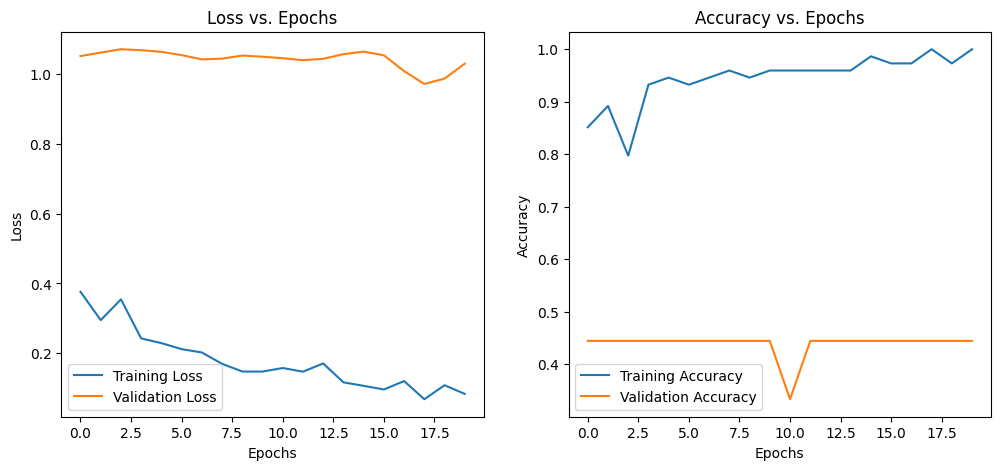

2/2 [==============================] - 0s 25ms/step - loss: 0.9630 - accuracy: 0.5278
Test Loss: 0.9630203247070312, Test Accuracy: 0.5277777910232544
2/2 [==============================] - 0s 23ms/step
              precision    recall  f1-score   support

           0       0.18      0.25      0.21         8
           1       0.84      0.70      0.76        23
           2       0.17      0.20      0.18         5

    accuracy                           0.53        36
   macro avg       0.40      0.38      0.38        36
weighted avg       0.60      0.53      0.56        36



In [8]:
import matplotlib.pyplot as plt

# Train the model and collect the training history
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1)

# Plot loss vs. accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss vs. Epochs')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy vs. Epochs')
plt.show()

# Evaluate the model on test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

# You can also print other classification metrics using scikit-learn, such as precision, recall, and F1 score.
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)  # Convert predicted probabilities to class labels
print(classification_report(y_test, y_pred))


In [9]:
import pandas as pd
import numpy as np
from scipy.signal import butter, lfilter

# Define bandpass filter parameters
lowcut = 1.0  # Low cutoff frequency in Hz
highcut = 40.0  # High cutoff frequency in Hz
fs = 160.25 # Sampling frequency of your EEG data

# Function to apply the bandpass filter
def bandpass_filter(data):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(4, [low, high], btype='band')
    filtered_data = lfilter(b, a, data, axis=0)
    return filtered_data

# Load the original EEG data from the CSV file
original_data = pd.read_csv(r"C:\Users\HP\Desktop\Dataset\Model_Input\Total_LR.csv")

# Define the number of rows in each epoch (e.g., 641 rows for 4 seconds)
epoch_length = 641

# Initialize a list to store preprocessed epochs
preprocessed_epochs = []

# Iterate through the original data to extract and preprocess each epoch
for i in range(0, len(original_data), epoch_length):
    epoch = original_data.iloc[i:i + epoch_length]

    # Ensure that the epoch is the correct length (641 rows)
    if len(epoch) == epoch_length:
        # Extract the EEG data
        eeg_data = epoch.iloc[:, 1:-1].values  # Assuming EEG channels are from column 1 to the second-to-last column

        # Apply the bandpass filter
        filtered_data = bandpass_filter(eeg_data)

        # Append the filtered epoch to the list
        preprocessed_epochs.append(filtered_data)

# Convert the list of preprocessed epochs to a NumPy array
preprocessed_epochs = np.array(preprocessed_epochs)

# Create a new DataFrame from the preprocessed epochs
preprocessed_df = pd.DataFrame(preprocessed_epochs)

# Write the preprocessed data to a new CSV file
preprocessed_df.to_csv(r"C:\Users\HP\Desktop\Dataset\Model_Input\preprocessed_eeg_data.csv", index=False)


ValueError: Must pass 2-d input. shape=(119, 641, 63)

In [10]:
import pandas as pd
import numpy as np
from scipy.signal import butter, lfilter

# Define bandpass filter parameters
lowcut = 1.0  # Low cutoff frequency in Hz
highcut = 40.0  # High cutoff frequency in Hz
fs = 256  # Sampling frequency of your EEG data

# Function to apply the bandpass filter
def bandpass_filter(data):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(4, [low, high], btype='band')
    filtered_data = lfilter(b, a, data, axis=0)
    return filtered_data

# Load the original EEG data from the CSV file
original_data = pd.read_csv(r"C:\Users\HP\Desktop\Dataset\Model_Input\Total_LR.csv")

# Define the number of rows in each epoch (e.g., 641 rows for 4 seconds)
epoch_length = 641

# Initialize a list to store preprocessed epochs
preprocessed_epochs = []

# Iterate through the original data to extract and preprocess each epoch
for i in range(0, len(original_data), epoch_length):
    epoch = original_data.iloc[i:i + epoch_length]

    # Ensure that the epoch is the correct length (641 rows)
    if len(epoch) == epoch_length:
        # Extract the EEG data
        eeg_data = epoch.iloc[:, 1:-1].values  # Assuming EEG channels are from column 1 to the second-to-last column

        # Apply the bandpass filter
        filtered_data = bandpass_filter(eeg_data)

        # Append the filtered epoch to the list
        preprocessed_epochs.append(filtered_data)

# Convert the list of preprocessed epochs to a NumPy array
preprocessed_epochs = np.array(preprocessed_epochs)

# Reshape the 3D array into a 2D structure (flatten each epoch into a row)
num_epochs, epoch_length, num_channels = preprocessed_epochs.shape
preprocessed_epochs_2d = preprocessed_epochs.reshape(num_epochs, -1)

# Create a new DataFrame from the preprocessed epochs
preprocessed_df = pd.DataFrame(preprocessed_epochs_2d)

# Write the preprocessed data to a new CSV file
preprocessed_df.to_csv(r"C:\Users\HP\Desktop\Dataset\Model_Input\preprocessed_eeg_data.csv", index=False)


In [11]:
import pandas as pd
import numpy as np
from scipy.signal import butter, lfilter

# Function to apply a bandpass filter to EEG data
def apply_bandpass_filter(eeg_data, lowcut, highcut, fs):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(4, [low, high], btype='band')
    filtered_data = lfilter(b, a, eeg_data, axis=0)
    return filtered_data

# Load the EEG data from the CSV file
original_data = pd.read_csv(r"C:\Users\HP\Desktop\Dataset\Model_Input\Total_LR.csv")

# Define filter parameters for motor imagery
lowcut = 7.0  # Low cutoff frequency (e.g., for mu rhythm)
highcut = 30.0  # High cutoff frequency

# Define the number of rows in each epoch (641 rows for 4 seconds)
epoch_length = 641

# Initialize a list to store preprocessed epochs
preprocessed_epochs = []

# Iterate through the EEG data to extract and preprocess each epoch
for i in range(0, len(eeg_data), epoch_length):
    epoch = eeg_data.iloc[i:i + epoch_length]

    # Ensure that the epoch is the correct length (641 rows)
    if len(epoch) == epoch_length:
        # Extract the EEG data
        eeg_data = epoch.iloc[:, 1:-1].values  # Assuming EEG channels are from column 1 to the second-to-last column

        # Apply the bandpass filter
        filtered_data = apply_bandpass_filter(eeg_data, lowcut, highcut, fs)

        # Append the filtered epoch to the list
        preprocessed_epochs.append(filtered_data)

# Convert the list of preprocessed epochs to a NumPy array
preprocessed_epochs = np.array(preprocessed_epochs)

# You can perform additional preprocessing steps if needed, such as normalization or artifact removal.

# Save the preprocessed data to a new CSV file
preprocessed_df = pd.DataFrame(preprocessed_epochs.reshape(-1, eeg_data.shape[1] - 2))  # Reshape back to 2D
preprocessed_df.to_csv(r"C:\Users\HP\Desktop\Dataset\Model_Input\preprocessed_eeg_data.csv", index=False)


AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

In [12]:
import pandas as pd
import numpy as np
from scipy.signal import butter, lfilter

# Function to apply a bandpass filter to EEG data
def apply_bandpass_filter(eeg_data, lowcut, highcut, fs):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(4, [low, high], btype='band')
    filtered_data = lfilter(b, a, eeg_data, axis=0)
    return filtered_data

# Load the EEG data from the CSV file
original_data = pd.read_csv(r"C:\Users\HP\Desktop\Dataset\Model_Input\Total_LR.csv")

# Define filter parameters for motor imagery
lowcut = 7.0  # Low cutoff frequency (e.g., for mu rhythm)
highcut = 30.0  # High cutoff frequency

# Define the number of rows in each epoch (641 rows for 4 seconds)
epoch_length = 641

# Initialize a list to store preprocessed epochs
preprocessed_epochs = []

# Iterate through the EEG data to extract and preprocess each epoch
for i in range(0, len(eeg_data), epoch_length):
    epoch = eeg_data.iloc[i:i + epoch_length]

    # Ensure that the epoch is the correct length (641 rows)
    if len(epoch) == epoch_length:
        # Extract the EEG data
        eeg_data = epoch.iloc[:, 1:-1].values  # Assuming EEG channels are from column 1 to the second-to-last column

        # Apply the bandpass filter
        filtered_data = apply_bandpass_filter(eeg_data, lowcut, highcut, fs)

        # Append the filtered epoch to the list
        preprocessed_epochs.append(filtered_data)

# Convert the list of preprocessed epochs to a NumPy array
preprocessed_epochs = np.array(preprocessed_epochs)

# You can perform additional preprocessing steps if needed, such as normalization or artifact removal.

# Save the preprocessed data to a new CSV file
preprocessed_df = pd.DataFrame(preprocessed_epochs.reshape(-1, eeg_data.shape[1] - 2))  # Reshape back to 2D
preprocessed_df.to_csv(r"C:\Users\HP\Desktop\Dataset\Model_Input\preprocessed_eeg_data.csv", index=False)


AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

In [15]:
import pandas as pd
import numpy as np
from scipy.signal import butter, lfilter

# Function to apply a bandpass filter to EEG data
def apply_bandpass_filter(eeg_data, lowcut, highcut, fs):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(4, [low, high], btype='band')
    filtered_data = lfilter(b, a, eeg_data, axis=0)
    return filtered_data

# Load the EEG data from the CSV file
eeg_data = pd.read_csv(r"C:\Users\HP\Desktop\Dataset\Model_Input\Total_LR.csv").values  # Convert to a NumPy array

# Define filter parameters for motor imagery
lowcut = 7.0  # Low cutoff frequency (e.g., for mu rhythm)
highcut = 30.0  # High cutoff frequency

# Define the number of rows in each epoch (641 rows for 4 seconds)
epoch_length = 641

# Initialize a list to store preprocessed epochs
preprocessed_epochs = []

# Iterate through the EEG data to extract and preprocess each epoch
for i in range(0, len(eeg_data), epoch_length):
    epoch = eeg_data[i:i + epoch_length]

    # Ensure that the epoch is the correct length (641 rows)
    if len(epoch) == epoch_length:
        # Apply the bandpass filter
        filtered_data = apply_bandpass_filter(epoch[:, :-1], lowcut, highcut, fs)  # Assuming EEG channels are from column 1 to the second-to-last column

        # Append the filtered epoch to the list
        preprocessed_epochs.append(filtered_data)

# Convert the list of preprocessed epochs to a NumPy array
preprocessed_epochs = np.array(preprocessed_epochs)

# You can perform additional preprocessing steps if needed, such as normalization or artifact removal.

# Save the preprocessed data to a new CSV file
preprocessed_df = pd.DataFrame(preprocessed_epochs.reshape(-1, eeg_data.shape[1] - 2))  # Reshape back to 2D
preprocessed_df.to_csv(r"C:\Users\HP\Desktop\Dataset\Model_Input\preprocessed_eeg_data.csv", index=False)


ValueError: cannot reshape array of size 4881856 into shape (63)

In [17]:
import pandas as pd
import numpy as np
from scipy.signal import butter, lfilter

# Function to apply a bandpass filter to EEG data
def apply_bandpass_filter(eeg_data, lowcut, highcut, fs):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(4, [low, high], btype='band')
    filtered_data = lfilter(b, a, eeg_data, axis=0)
    return filtered_data

# Load the EEG data from the CSV file
eeg_data = pd.read_csv(r"C:\Users\HP\Desktop\Dataset\Model_Input\Channel_data.csv")

# Define filter parameters for motor imagery
lowcut = 7.0  # Low cutoff frequency (e.g., for mu rhythm)
highcut = 30.0  # High cutoff frequency

# Define the number of rows in each epoch (641 rows for 4 seconds)
epoch_length = 641

# Initialize a list to store preprocessed epochs
preprocessed_epochs = []

# Iterate through the EEG data to extract and preprocess each epoch
for i in range(0, len(eeg_data), epoch_length):
    epoch = eeg_data.iloc[i:i + epoch_length]

    # Ensure that the epoch is the correct length (641 rows)
    if len(epoch) == epoch_length:
        # Extract the EEG data
        eeg_data_epoch = epoch.values[:, 1:]  # Exclude the first column (assumed to be a timestamp or index)

        # Apply the bandpass filter
        filtered_data = apply_bandpass_filter(eeg_data_epoch, lowcut, highcut, fs)

        # Append the filtered epoch to the list
        preprocessed_epochs.append(filtered_data)

# Convert the list of preprocessed epochs to a NumPy array
preprocessed_epochs = np.array(preprocessed_epochs)

# You can perform additional preprocessing steps if needed, such as normalization or artifact removal.

# Save the preprocessed data to a new CSV file
preprocessed_df = pd.DataFrame(preprocessed_epochs.reshape(-1, eeg_data_epoch.shape[1]))
preprocessed_df.to_csv(r"C:\Users\HP\Desktop\Dataset\Model_Input\preprocessed_eeg_data.csv", index=False)


In [18]:
import pandas as pd
import numpy as np
from scipy.signal import butter, lfilter

# Function to apply a bandpass filter to EEG data
def apply_bandpass_filter(eeg_data, lowcut, highcut, fs):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(4, [low, high], btype='band')
    filtered_data = lfilter(b, a, eeg_data, axis=0)
    return filtered_data

# Load the EEG data from the CSV file without headers
eeg_data = pd.read_csv(r"C:\Users\HP\Desktop\Dataset\Model_Input\Channel_data.csv", header=None).values

# Define filter parameters for motor imagery
lowcut = 7.0  # Low cutoff frequency (e.g., for mu rhythm)
highcut = 30.0  # High cutoff frequency

# Define the number of rows in each epoch (641 rows for 4 seconds)
epoch_length = 641

# Initialize a list to store preprocessed epochs
preprocessed_epochs = []

# Iterate through the EEG data to extract and preprocess each epoch
for i in range(0, len(eeg_data), epoch_length):
    epoch = eeg_data[i:i + epoch_length]

    # Ensure that the epoch is the correct length (641 rows)
    if len(epoch) == epoch_length:
        # Extract the EEG data
        eeg_data_epoch = epoch  # Use all columns

        # Apply the bandpass filter
        filtered_data = apply_bandpass_filter(eeg_data_epoch, lowcut, highcut, fs)

        # Append the filtered epoch to the list
        preprocessed_epochs.append(filtered_data)

# Convert the list of preprocessed epochs to a NumPy array
preprocessed_epochs = np.array(preprocessed_epochs)

# You can perform additional preprocessing steps if needed, such as normalization or artifact removal.

# Save the preprocessed data to a new CSV file
preprocessed_df = pd.DataFrame(preprocessed_epochs.reshape(-1, eeg_data_epoch.shape[1]))
preprocessed_df.to_csv(r"C:\Users\HP\Desktop\Dataset\Model_Input\preprocessed_eeg_data.csv", index=False)


C:\Users\HP\AppData\Local\Temp\ipykernel_19264\3113585855.py:15: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63) have mixed types. Specify dtype option on import or set low_memory=False.
  eeg_data = pd.read_csv(r"C:\Users\HP\Desktop\Dataset\Model_Input\Channel_data.csv", header=None).values


TypeError: can't multiply sequence by non-int of type 'float'

In [20]:
import pandas as pd
import numpy as np
from scipy.signal import butter, lfilter

# Function to apply a bandpass filter to EEG data
def apply_bandpass_filter(eeg_data, lowcut, highcut, fs):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(4, [low, high], btype='band')
    filtered_data = lfilter(b, a, eeg_data, axis=0)
    return filtered_data

# Load the EEG data from the CSV file without headers, specifying the data type as float
eeg_data = pd.read_csv(r"C:\Users\HP\Desktop\Dataset\Model_Input\Channel_data.csv", header=None, dtype=float).values

# Define filter parameters for motor imagery
lowcut = 7.0  # Low cutoff frequency (e.g., for mu rhythm)
highcut = 30.0  # High cutoff frequency

# Define the number of rows in each epoch (641 rows for 4 seconds)
epoch_length = 641

# Initialize a list to store preprocessed epochs
preprocessed_epochs = []

# Iterate through the EEG data to extract and preprocess each epoch
for i in range(0, len(eeg_data), epoch_length):
    epoch = eeg_data[i:i + epoch_length]

    # Ensure that the epoch is the correct length (641 rows)
    if len(epoch) == epoch_length:
        # Apply the bandpass filter
        filtered_data = apply_bandpass_filter(epoch, lowcut, highcut, fs)

        # Append the filtered epoch to the list
        preprocessed_epochs.append(filtered_data)

# Convert the list of preprocessed epochs to a NumPy array
preprocessed_epochs = np.array(preprocessed_epochs)

# You can perform additional preprocessing steps if needed, such as normalization or artifact removal.

# Save the preprocessed data to a new CSV file
preprocessed_df = pd.DataFrame(preprocessed_epochs.reshape(-1, eeg_data.shape[1]))
preprocessed_df.to_csv(r"C:\Users\HP\Desktop\Dataset\Model_Input\preprocessed_eeg_data.csv", index=False)
